In [1]:
import coco
import parallel_coco as pcoco

In [3]:
C = coco.Chocolate(amount=0.01)
CP = pcoco.ParallelChocolate(C)
print(CP.melting_time())
coco.melt(CP)
print(CP.temp)
print()
print(CP.cooling_time())
coco.temper(CP)
print(CP.temp)

1.15
Running melt using parallel backend
melting...
melting done in 1.15 seconds
318.15
40.6812265680777
Running temper using parallel backend
tempering...
tempering done in 5.09 seconds
304.15


In [4]:
C1 = coco.Chocolate(amount=0.01)
print(C1.melting_time())
print(coco.melt(C1))
print(C1.temp)
print()
print(C1.cooling_time())
print(coco.temper(C1))
print(C1.temp)

1.15
melting...
melting done in 1.15 seconds
None
318.15
40.6812265680777
tempering...
tempering done in 40.68 seconds
None
304.15


In [6]:
import networkx as nx
import nx_parallel as nxp

In [7]:
G = nx.fast_gnp_random_graph(20, 0.8)

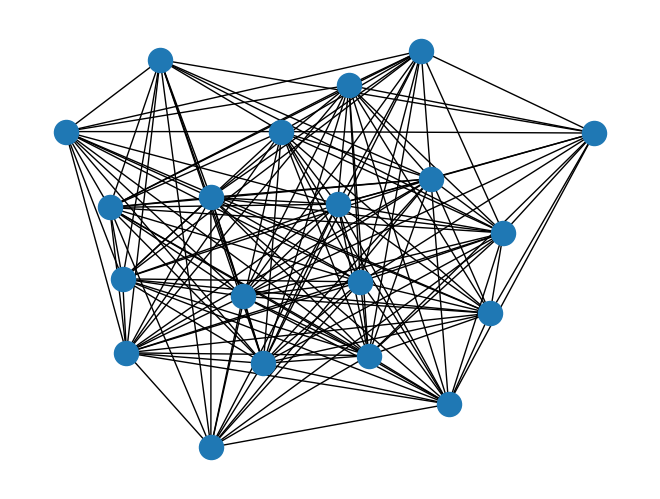

In [9]:
nx.draw(G)

In [10]:
nx.betweenness_centrality(G)

{0: 0.006610429856043891,
 1: 0.007723352021597635,
 2: 0.01227925745469605,
 3: 0.01227925745469605,
 4: 0.006298095991078447,
 5: 0.007032782032782034,
 6: 0.006123100421346035,
 7: 0.010964774341967326,
 8: 0.012169977520854714,
 9: 0.005937808130790587,
 10: 0.0062517485763099795,
 11: 0.010185996589505362,
 12: 0.011575283066511136,
 13: 0.00711144768162312,
 14: 0.011463917823566944,
 15: 0.012768461233373513,
 16: 0.014931340589235325,
 17: 0.00965085921226272,
 18: 0.012617832135375992,
 19: 0.0031587807903597368}

In [11]:
H = nxp.ParallelGraph(G)
nx.betweenness_centrality(H)

{0: 0.006610429856043891,
 1: 0.007723352021597635,
 2: 0.01227925745469605,
 3: 0.01227925745469605,
 4: 0.006298095991078447,
 5: 0.007032782032782034,
 6: 0.006123100421346035,
 7: 0.010964774341967323,
 8: 0.012169977520854712,
 9: 0.005937808130790587,
 10: 0.0062517485763099795,
 11: 0.010185996589505362,
 12: 0.011575283066511136,
 13: 0.00711144768162312,
 14: 0.011463917823566944,
 15: 0.012768461233373513,
 16: 0.014931340589235325,
 17: 0.00965085921226272,
 18: 0.012617832135375992,
 19: 0.0031587807903597368}

In [12]:
nx.betweenness_centrality(G, backend="parallel")

{0: 0.006610429856043891,
 1: 0.007723352021597635,
 2: 0.01227925745469605,
 3: 0.01227925745469605,
 4: 0.006298095991078447,
 5: 0.007032782032782034,
 6: 0.006123100421346035,
 7: 0.010964774341967323,
 8: 0.012169977520854712,
 9: 0.005937808130790587,
 10: 0.0062517485763099795,
 11: 0.010185996589505362,
 12: 0.011575283066511136,
 13: 0.00711144768162312,
 14: 0.011463917823566944,
 15: 0.012768461233373513,
 16: 0.014931340589235325,
 17: 0.00965085921226272,
 18: 0.012617832135375992,
 19: 0.0031587807903597368}

In [13]:
G = nx.DiGraph()

# dataset: https://snap.stanford.edu/data/ca-HepPh.html
with open('/Users/aditi/Desktop/ca-HepPh.txt', 'r') as f:
    for line in f:
        from_node, to_node = map(int, line.strip().split())
        G.add_edge(from_node, to_node)
print(G)

DiGraph with 12008 nodes and 237010 edges


In [14]:
from timeit import default_timer as timer

In [15]:
start = timer()
nx.betweenness_centrality(G, backend="parallel")
end = timer()
print("nx-parallel : ", end - start, "seconds")

nx-parallel :  300.6135732922703 seconds


In [16]:
start = timer()
nx.betweenness_centrality(G)
end = timer()
print("NetworkX : ", end - start, "seconds")

NetworkX :  924.8272116668522 seconds
